In [1]:
from ORBIT.phases.design import ElectricalDesign
from ORBIT import ParametricManager, ProjectManager
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Cable Cost

## Distance to Shore

In [2]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 60
    },
    'plant': {
        'turbine_rating': 10,
#          'num_turbines': 50, 
#          'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
    'export_system_design': {
        'cables': 'XLPE_500mm_220kV',
    }
    
}

In [3]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
    'site.distance_to_landfall': np.arange(50,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(300,2100,100)
}

In [4]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
}

In [5]:
parametric = ParametricManager(base_config, parameters, results, module = ElectricalDesign, product=True)
parametric.run()
parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

ORBIT library intialized at 'C:\Users\sbredenk\ORBIT\library'


,site.distance_to_landfall,plant.capacity,cable_cost,oss_cost
0,50,300,7.051660e+07,6.281680e+07
1,50,400,7.051660e+07,6.951580e+07
2,50,500,1.057749e+08,9.003345e+07
3,50,600,1.057749e+08,9.673245e+07
4,50,700,1.057749e+08,1.034314e+08
...,...,...,...,...
319,305,1600,1.433833e+09,6.780425e+08
320,305,1700,1.433833e+09,7.009405e+08
321,305,1800,1.638666e+09,7.856789e+08
322,305,1900,1.638666e+09,7.901449e+08


In [6]:
model = parametric.create_model(["plant.capacity","site.distance_to_landfall"],'cable_cost')
model.sm.summary()
# model.predict(parameters)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cable_cost   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1680.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          8.77e-171
Time:                        14:39:52   Log-Likelihood:                -6469.5
No. Observations:                 324   AIC:                         1.294e+04
Df Residuals:                     321   BIC:                         1.296e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.423e+08   2.11e+07    -25.642      0.000   -5.84e+08   -5.01e+08
plant.capacity             4.807e+05   1.22e+04     39.314      0.000    4.57e+05    5.05e+05
site.distance_to_landfall  3.473e+06   8.15e+04     42.605      0.000    3.31e+06    3.63e+06
==============================================================================
Omnibus:                        2.305   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.033
Skew:                           0.142   Prob(JB):                        0.362
Kurtosis:                       3.265   Cond. No.                     4.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model.perc_diff

0      4.182942
1      3.501289
2      2.213090
3      1.758655
4      1.304219
         ...   
319    0.103110
320    0.069586
321    0.156554
322    0.127221
323    0.198122
Name: cable_cost, Length: 324, dtype: float64

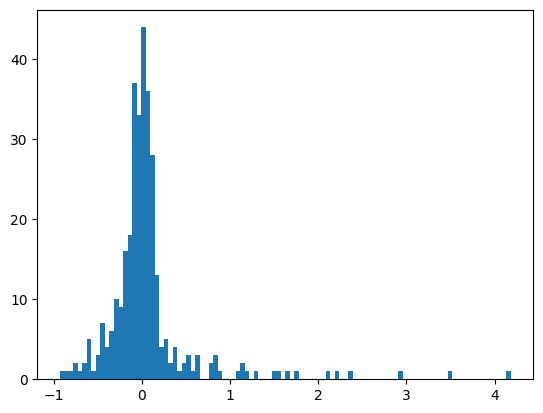

In [8]:
plt.hist(model.perc_diff,bins = 100)
plt.show()

In [9]:
# dist = np.arange(50,315,15)
# cap = np.arange(300,2100,100)
# cablecost = np.zeros(len(dist))
# # print(len(cap))
# for i in np.arange(0,len(dist)):
#     cablecost[i] = parametric.results.cable_cost[19*i]


In [10]:
# print(cablecost)

# ax = plt.axes(projection = '3d')
# ax.plot3D(dist,cap,model.predict(parameters))
# ax.plot3D(dist,cap,cablecost)
# plt.legend(["predict","orbit"])
# plt.show()

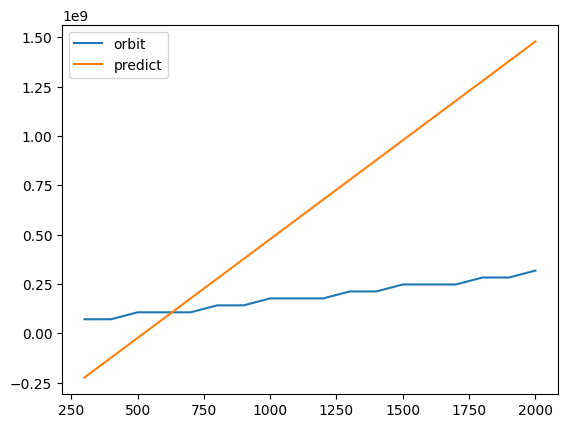

In [11]:
# dist = np.arange(50,315,15)
cap = np.arange(300,2100,100)

plt.plot(cap,parametric.results.cable_cost[0:18])
plt.plot(cap,model.predict(parameters)[0:18])
plt.legend(["orbit","predict"])
plt.show()

In [12]:
len(model.predict(parameters))

18

## Plant Capacity

In [13]:
base_config1 = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 60
    },
    'plant': {
        'turbine_rating': 10,
#          'num_turbines': 50, 
#          'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
    'export_system_design': {
        'cables': 'XLPE_500mm_220kV',
    }
    
}

In [14]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
    'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,2100,100)
}

In [15]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
}

In [16]:
parametric1 = ParametricManager(base_config1, parameters, results, module = ElectricalDesign, product=True)
parametric1.run()
# parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

In [17]:
model1 = parametric1.create_model(["plant.capacity"],'cable_cost')

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

In [18]:
model1.perc_diff

0      -7.398858
1     -11.015592
2      -6.816162
3      -8.624529
4      -6.621931
         ...    
395     0.467762
396     0.437037
397     0.480522
398     0.453637
399     0.490446
Name: cable_cost, Length: 400, dtype: float64

# OSS Cost

## Distance to Shore

In [19]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 60
    },
    'plant': {
        'turbine_rating': 10,
#          'num_turbines': 50, 
         'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
    'export_system_design': {
        'cables': 'XLPE_500mm_220kV',
    }
    
}

In [20]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
    'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
#     'plant.capacity': np.arange(100,2100,100)
}

In [21]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
    'num_substations': lambda run: run.num_substations
}

In [22]:
parametric = ParametricManager(base_config, parameters, results, module = ElectricalDesign, product=True)
parametric.run()
# parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

In [23]:
model = parametric.create_model(["site.distance_to_landfall"],'oss_cost')

In [24]:
model.perc_diff

0     8.172125e-16
1     5.956174e-16
2     8.634491e-16
3     7.639807e-16
4     5.480498e-16
5     4.967373e-16
6     5.677634e-16
7     6.275873e-16
8     5.817131e-16
9     3.613924e-16
10    5.075180e-16
11    4.770924e-16
12    4.501086e-16
13    5.680182e-16
14    5.391564e-16
15    3.848143e-16
16    4.894202e-16
17    4.678414e-16
18    3.360638e-16
19    2.149649e-16
Name: oss_cost, dtype: float64

## Plant Capacity

In [25]:
base_config1 = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
        'distance_to_landfall': 60
    },
    'plant': {
        'turbine_rating': 10,
#          'num_turbines': 50, 
#          'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
    'export_system_design': {
        'cables': 'XLPE_500mm_220kV',
    }
    
}

In [26]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
#     'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,900,100)
}

In [27]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
}

In [28]:
parametric1 = ParametricManager(base_config1, parameters, results, module = ElectricalDesign, product=True)
parametric1.run()
# parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

In [29]:
model1 = parametric1.create_model(["plant.capacity"],'oss_cost')

In [30]:
model1.predict(parameters)

array([3.67371173e+07, 5.02341251e+07, 6.37311329e+07, 7.72281408e+07,
       9.07251486e+07, 1.04222156e+08, 1.17719164e+08, 1.31216172e+08])

In [31]:
model1.perc_diff

0    0.035688
1   -0.121405
2    0.060151
3   -0.036495
4    0.069707
5    0.000000
6   -0.061287
7    0.020302
Name: oss_cost, dtype: float64

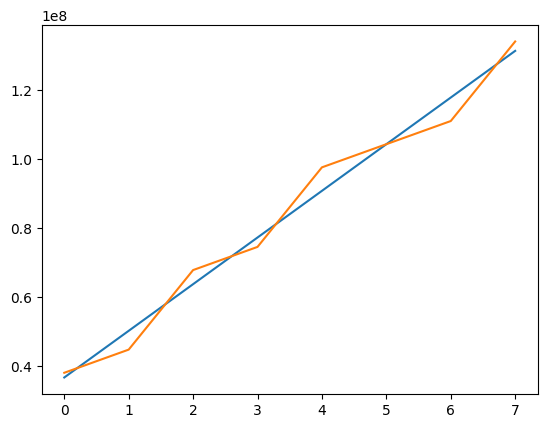

ValueError: Missing input(s) '['site.distance_to_landfall']'

In [32]:
plt.plot(model1.predict(parameters))
plt.plot(parametric1.results.oss_cost)
plt.show()
print(model.predict(parameters))

# Both (2 independent variables)